<a href="https://colab.research.google.com/github/kamarshahein/Epsilon/blob/main/advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report

In [6]:
ad = pd.read_csv('/content/advertising.csv')
ad

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [7]:
ad.info

<bound method DataFrame.info of      Daily Time Spent on Site  Age  ...            Timestamp  Clicked on Ad
0                       68.95   35  ...  2016-03-27 00:53:11              0
1                       80.23   31  ...  2016-04-04 01:39:02              0
2                       69.47   26  ...  2016-03-13 20:35:42              0
3                       74.15   29  ...  2016-01-10 02:31:19              0
4                       68.37   35  ...  2016-06-03 03:36:18              0
..                        ...  ...  ...                  ...            ...
995                     72.97   30  ...  2016-02-11 21:49:00              1
996                     51.30   45  ...  2016-04-22 02:07:01              1
997                     51.63   51  ...  2016-02-01 17:24:57              1
998                     55.55   19  ...  2016-03-24 02:35:54              0
999                     45.01   26  ...  2016-06-03 21:43:21              1

[1000 rows x 10 columns]>

In [8]:
ad.notnull()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
995,True,True,True,True,True,True,True,True,True,True
996,True,True,True,True,True,True,True,True,True,True
997,True,True,True,True,True,True,True,True,True,True
998,True,True,True,True,True,True,True,True,True,True


In [10]:
ad.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [11]:
ad.groupby('Country').describe()['Daily Time Spent on Site'].loc['Tunisia']

count     4.000000
mean     62.942500
std      14.208684
min      42.840000
25%      58.890000
50%      66.595000
75%      70.647500
max      75.740000
Name: Tunisia, dtype: float64

In [12]:
ad.groupby('Country').describe()['Age'].loc['Tunisia']

count     4.000000
mean     35.500000
std      11.733144
min      25.000000
25%      28.750000
50%      32.500000
75%      39.250000
max      52.000000
Name: Tunisia, dtype: float64

In [13]:
ad['Age'].max()

61

In [14]:
ad[(ad['Age'] == ad['Age'].min()) & (ad['Male'] == 0)]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
349,60.91,19,53309.61,184.94,Upgradable directional system engine,Port Kathleenfort,0,Nauru,2016-06-09 14:24:06,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [15]:
ad['Timestamp'] = pd.to_datetime(ad['Timestamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
ad

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [16]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.2+ KB


In [20]:
#to get a new columns for season and period
def get_season(timestamp):
    if timestamp.month in [12, 1, 2]:
        return 'Winter'
    elif timestamp.month in [3, 4, 5]:
        return 'Spring'
    elif timestamp.month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autamn'
    
def get_period(timestamp):
    if timestamp.hour in range(13):
        return 'Morning'
    else:
        return 'Evening'

In [21]:
ad['Season'] = ad['Timestamp'].apply(get_season)
ad['Period'] = ad['Timestamp'].apply(get_period)

In [22]:
ad

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Season,Period
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,Spring,Morning
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,Spring,Morning
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,Spring,Evening
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,Winter,Morning
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,Summer,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,Winter,Evening
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,Spring,Morning
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,Winter,Evening
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,Spring,Morning


<Figure size 1440x1440 with 0 Axes>

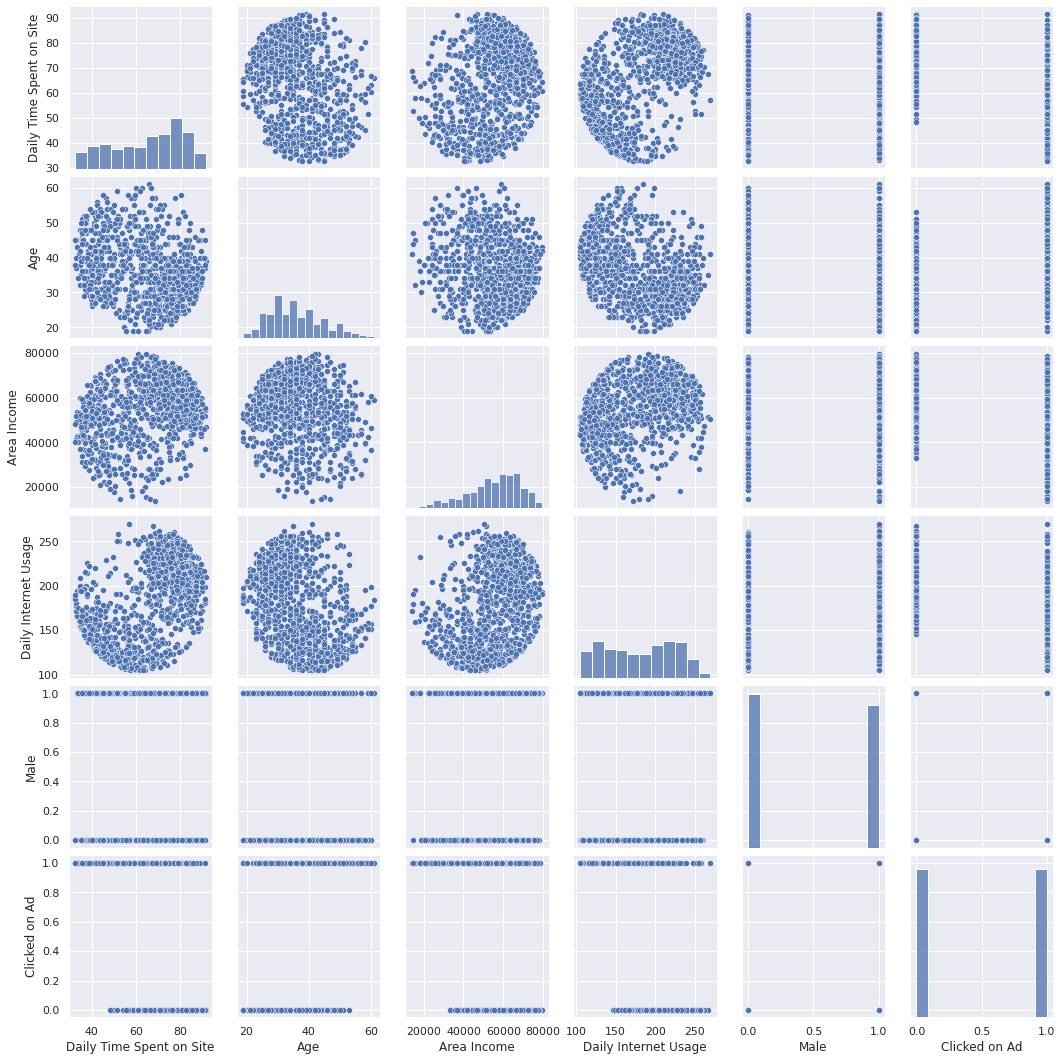

In [28]:
sns.pairplot(ad)

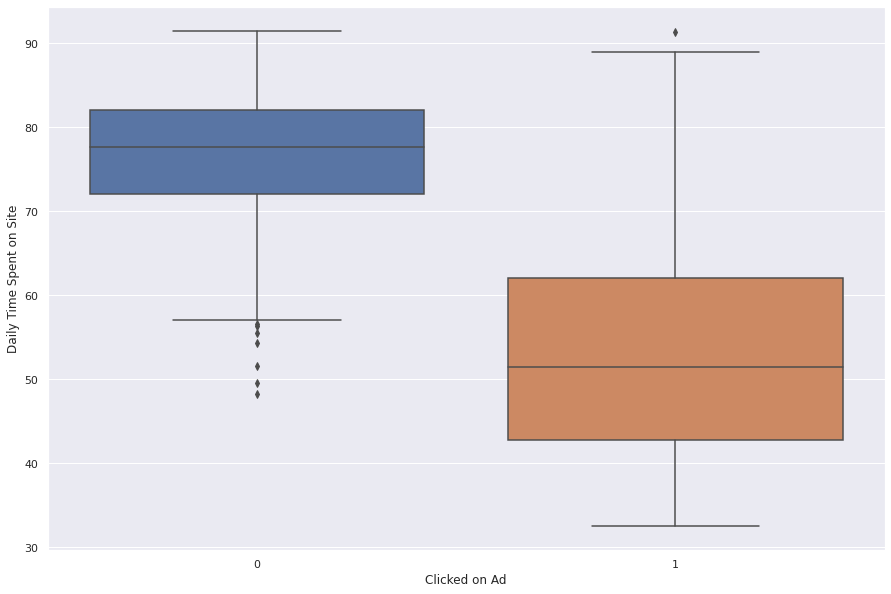

In [48]:
sns.boxplot(x='Clicked on Ad', y='Daily Time Spent on Site', data=ad)
plt.rcParams["figure.figsize"] = (15, 10)

In [35]:
ad['Clicked on Ad'].value_counts()

1    500
0    500
Name: Clicked on Ad, dtype: int64

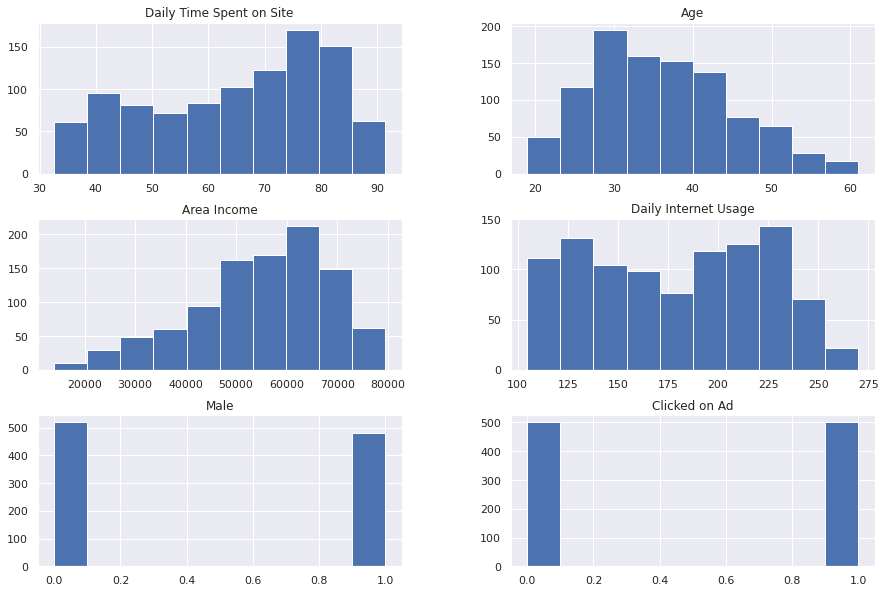

In [50]:
ad.hist(bins=10)
plt.rcParams["figure.figsize"] = (15, 10)

In [52]:
ad['Ad Topic Line'].value_counts()

Inverse zero-defect capability            1
Right-sized logistical middleware         1
Cross-group human-resource time-frame     1
Object-based reciprocal knowledgebase     1
Pre-emptive client-driven secured line    1
                                         ..
Realigned tangible collaboration          1
Optimized systemic capability             1
Automated mobile model                    1
Versatile content-based protocol          1
Reactive needs-based instruction set      1
Name: Ad Topic Line, Length: 1000, dtype: int64

In [53]:
ad = pd.get_dummies(ad, columns=['City', 'Country', 'Season', 'Period'], drop_first=True)
ad

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,Male,Timestamp,Clicked on Ad,City_Adamside,City_Adamsstad,City_Alanview,City_Alexanderfurt,City_Alexanderview,City_Alexandrafort,City_Alexisland,City_Aliciatown,City_Alvaradoport,City_Alvarezland,City_Amandafort,City_Amandahaven,City_Amandaland,City_Amyfurt,City_Amyhaven,City_Andersonchester,City_Andersonfurt,City_Andersonton,City_Andrewborough,City_Andrewmouth,City_Angelhaven,City_Anthonyfurt,City_Ashleychester,City_Ashleymouth,City_Austinborough,City_Austinland,City_Bakerhaven,City_Barbershire,City_Beckton,City_Benjaminchester,City_Bernardton,City_Bethburgh,...,Country_Suriname,Country_Svalbard & Jan Mayen Islands,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Taiwan,Country_Tajikistan,Country_Tanzania,Country_Thailand,Country_Timor-Leste,Country_Togo,Country_Tokelau,Country_Tonga,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Turks and Caicos Islands,Country_Tuvalu,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States Minor Outlying Islands,Country_United States Virgin Islands,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe,Season_Summer,Season_Winter,Period_Morning
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,0,2016-03-27 00:53:11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,80.23,31,68441.85,193.77,Monitored national standardization,1,2016-04-04 01:39:02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,0,2016-03-13 20:35:42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,1,2016-01-10 02:31:19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,0,2016-06-03 03:36:18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,1,2016-02-11 21:49:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,1,2016-04-22 02:07:01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,1,2016-02-01 17:24:57,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,0,2016-03-24 02:35:54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [55]:
x = ad.drop(['Ad Topic Line', 'Timestamp', 'Clicked on Ad'], axis=1)
y = ad['Clicked on Ad']

In [56]:
x

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,City_Adamside,City_Adamsstad,City_Alanview,City_Alexanderfurt,City_Alexanderview,City_Alexandrafort,City_Alexisland,City_Aliciatown,City_Alvaradoport,City_Alvarezland,City_Amandafort,City_Amandahaven,City_Amandaland,City_Amyfurt,City_Amyhaven,City_Andersonchester,City_Andersonfurt,City_Andersonton,City_Andrewborough,City_Andrewmouth,City_Angelhaven,City_Anthonyfurt,City_Ashleychester,City_Ashleymouth,City_Austinborough,City_Austinland,City_Bakerhaven,City_Barbershire,City_Beckton,City_Benjaminchester,City_Bernardton,City_Bethburgh,City_Birdshire,City_Blairborough,City_Blairville,...,Country_Suriname,Country_Svalbard & Jan Mayen Islands,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Taiwan,Country_Tajikistan,Country_Tanzania,Country_Thailand,Country_Timor-Leste,Country_Togo,Country_Tokelau,Country_Tonga,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Turks and Caicos Islands,Country_Tuvalu,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States Minor Outlying Islands,Country_United States Virgin Islands,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe,Season_Summer,Season_Winter,Period_Morning
0,68.95,35,61833.90,256.09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,80.23,31,68441.85,193.77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,69.47,26,59785.94,236.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,74.15,29,54806.18,245.89,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,68.37,35,73889.99,225.58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
996,51.30,45,67782.17,134.42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
997,51.63,51,42415.72,120.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
998,55.55,19,41920.79,187.95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [57]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [60]:
x_train.shape

(800, 1212)

In [61]:
x_test.shape

(200, 1212)

In [62]:
y_train.shape

(800,)

In [63]:
y_test.shape

(200,)

In [65]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [66]:
x_train

array([[ 0.75611052, -1.36706012,  0.39216775, ..., -0.57735027,
         1.50509339, -1.05659932],
       [ 0.57702601, -0.35483955,  0.52403   , ..., -0.57735027,
        -0.6644106 , -1.05659932],
       [ 0.91677853, -0.91718431,  0.26537396, ...,  1.73205081,
        -0.6644106 ,  0.94643256],
       ...,
       [ 0.67990434, -1.02965326, -0.1454486 , ..., -0.57735027,
         1.50509339,  0.94643256],
       [ 1.45339701,  0.20750522, -0.61975862, ..., -0.57735027,
         1.50509339,  0.94643256],
       [-0.86390574,  1.6696016 , -0.9343956 , ..., -0.57735027,
         1.50509339, -1.05659932]])

In [68]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "Naive Bayes": GaussianNB()
}

In [69]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'Testing Recall: {recall_score(y_test, y_pred)}')    
    print(f'Testing Precesion: {precision_score(y_test, y_pred)}')
    print(f'Testing F-1: {f1_score(y_test, y_pred)}')
    print(f'Testing F-Beta: {fbeta_score(y_test, y_pred, beta=0.5)}')
    print('-'*30)

Training Model LR 
--------------
Training Accuracy: 1.0
Testing Accuracy: 0.94
Testing Confusion Matrix: 
[[99  6]
 [ 6 89]]
Testing Recall: 0.9368421052631579
Testing Precesion: 0.9368421052631579
Testing F-1: 0.9368421052631579
Testing F-Beta: 0.9368421052631579
------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.83875
Testing Accuracy: 0.505
Testing Confusion Matrix: 
[[15 90]
 [ 9 86]]
Testing Recall: 0.9052631578947369
Testing Precesion: 0.48863636363636365
Testing F-1: 0.6346863468634687
Testing F-Beta: 0.5381727158948686
------------------------------
Training Model SVC 
--------------
Training Accuracy: 0.99875
Testing Accuracy: 0.91
Testing Confusion Matrix: 
[[97  8]
 [10 85]]
Testing Recall: 0.8947368421052632
Testing Precesion: 0.9139784946236559
Testing F-1: 0.9042553191489361
Testing F-Beta: 0.9100642398286937
------------------------------
Training Model DT 
--------------
Training Accuracy: 1.0
Testing Accuracy: 0.95
Testing Confusion

In [70]:
model = RandomForestClassifier()

model.fit(x_train, y_train)

RandomForestClassifier()

In [71]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0])

In [73]:
y_test

507    1
820    1
732    0
862    0
667    0
      ..
315    1
466    1
940    1
965    1
162    0
Name: Clicked on Ad, Length: 200, dtype: int64